# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Defining models using sequential vs. class
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [74]:
# NOTE: copied from notebook DUDL_ANN_classifyQwerties.ipynb

In [75]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import rndData as myData

# NEW!
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

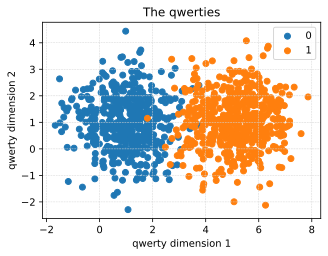

In [76]:
# define cluster locations:
locs = [[1, 1], [5, 1]]
nPerClust = 500

# create data
data, labels, clusters = myData.createData(
    nPerClust,
    locs,
    blur=1,
    xyLabels=("qwerty dimension 1", "qwerty dimension 2"),
    title="The qwerties",
    plot=True,
)

In [77]:
data_np = data.numpy()

# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(1000, 2)
 
<class 'torch.Tensor'>
torch.Size([1000, 2])


In [78]:
# # build the model
# ANNclassify = nn.Sequential(
#     nn.Linear(2,1),   # input layer
#     nn.ReLU(),        # activation unit
#     nn.Linear(1,1),   # output unit
#     nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
#       )


In [79]:
### define the class

class theClass4ANN(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(2,4)
    
    ### output layer
    self.output = nn.Linear(4,1)

  # forward pass
  def forward(self,x):

    # pass through the input layer
    x = self.input(x)

    # apply relu
    x = F.relu( x )

    # output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x


### create an instance of the class
ANNclassify = theClass4ANN()

In [80]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [81]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

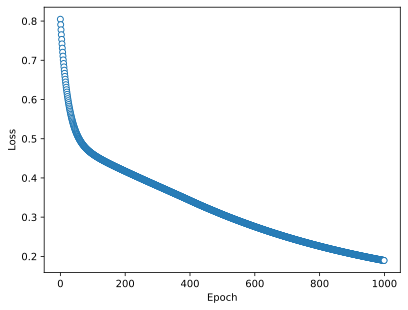

In [82]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [83]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 96.4%


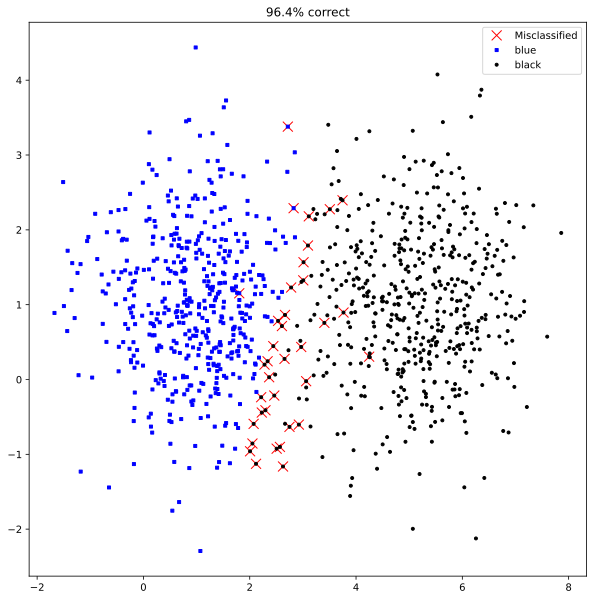

In [91]:
# plot the labeled data
from matplotlib import markers


fig = plt.figure(figsize=(10,10))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=10,markeredgewidth=1)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs', markersize=3)
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko', markersize=3)

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()